In [5]:
#импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ШАГ 1. ОТКРОЙТЕ ФАЙЛ С ДАННЫМИ И ИЗУЧИТЕ ОБЩУЮ ИНФОРМАЦИЮ
занесем данный csv в дата фрейм формат в переменную data
и выведем общую информацию о нем и первых строк

In [6]:
# Загрузка данных
data = pd.read_csv('games.csv')  
# Просмотр общей информации о данных
print(data.info())
# Просмотр первых нескольких строк данных
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип
данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали
это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.
Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.


In [7]:
# Замена названий столбцов на нижний регистр
data.columns = data.columns.str.lower()

# Преобразование типов данных
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce')

# Объяснение выбора типов данных:
# Год выпуска преобразовываем в числовой формат, т.к. это числовое значение,
# и использование числового формата упростит анализ.

# Обработка пропусков в 'year_of_release'
# Пропуски могли возникнуть из-за недостаточной информации о годе выпуска, поэтому заменим их на некий отметитель, например, 0 или NaN:
data['year_of_release'].fillna(0, inplace=True)  

# Обработка значения 'tbd' в столбце с оценкой пользователей
# 'tbd' означает "To Be Determined" и указывает на то, что оценка пока не определена.
# Мы можем заменить 'tbd' на NaN, чтобы обозначить отсутствие данных.
data['user_score'].replace('tbd', pd.NA, inplace=True)

# Преобразование типа данных в 'user_score'
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Подсчет суммарных продаж во всех регионах и запись в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


Заполнение пропусков в данных обычно осуществляется для улучшения обработки и анализа данных. При обработке данных о видеоиграх такие пропуски могут возникать по нескольким причинам:

Отсутствие информации: Иногда информация о годе выпуска или оценках может быть утеряна или недоступна из-за различных причин, таких как ошибки в записи данных, неполные данные из-за отсутствия информации на момент сбора или ошибки в процессе передачи данных.

Неопределенность в оценках: Значение 'tbd' (To Be Determined) в оценках пользователей может указывать на то, что оценка еще не установлена или отсутствует.

Замена пропусков выполняется с учетом характера данных:

Замена пропусков в годе выпуска: Пропуски в годе выпуска можно заменить нулевыми значениями (0) для того, чтобы указать на отсутствие данных. Это поможет сохранить запись о каждой игре, при этом не искажая анализ влияния года выпуска на продажи.

Замена 'tbd' в оценках пользователей: 'tbd' означает, что оценка пока не определена. Замена этого значения на NaN (Not a Number) - специальное значение, обозначающее отсутствие данных, позволяет сохранить эту информацию в числовом формате для дальнейшего анализа.

Не заполнение пропусков в общих продажах: Пропуски в общих продажах (total_sales) не заполняются, так как эти данные являются суммой продаж по разным регионам. Заполнение пропусков может исказить общие результаты и влияние общих продаж на другие параметры анализа.

Важно сохранять баланс между сохранением информации и избеганием искажения данных, поэтому выбор метода обработки пропусков зависит от специфики данных и целей анализа.

сделаем промежуточное отображение

In [9]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [10]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам. За какой
характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период
определите самостоятельно в результате исследования предыдущих вопросов. Основной
фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько
потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы
пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между
отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых
прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

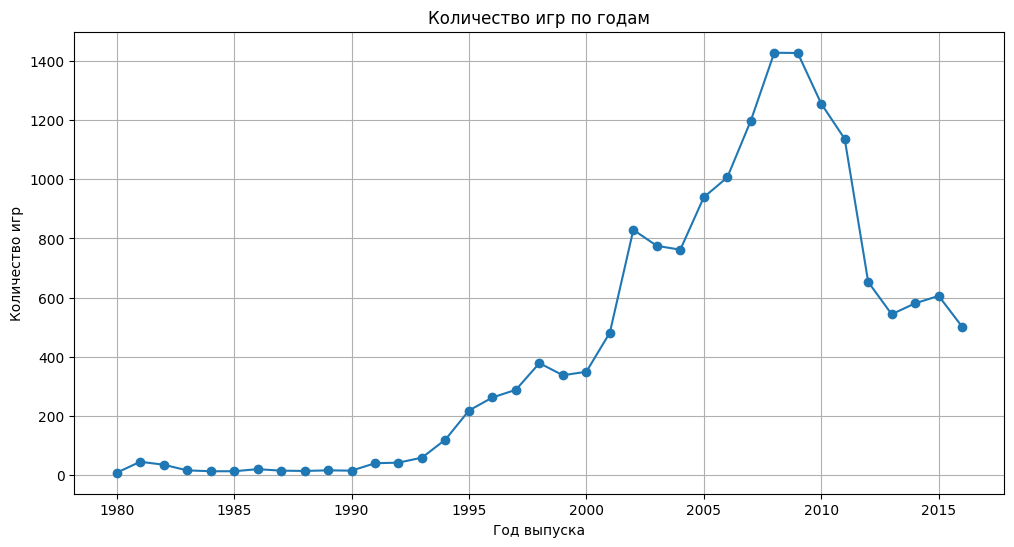

In [8]:
# Подготовим данные, исключив годы с пропущенными значениями
# Исключаем годы с нулевыми значениями
valid_years = data[data['year_of_release'] != 0]  

games_per_year = valid_years.groupby('year_of_release')['name'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(games_per_year['year_of_release'], games_per_year['name'], marker='o', linestyle='-')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам')
plt.grid(True)
plt.show()

было сделано: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды? 
Проанализировав график, можно четко отметить, далеко не все года важны так как индустрия игр начала развиваться поздно относительно всего периода

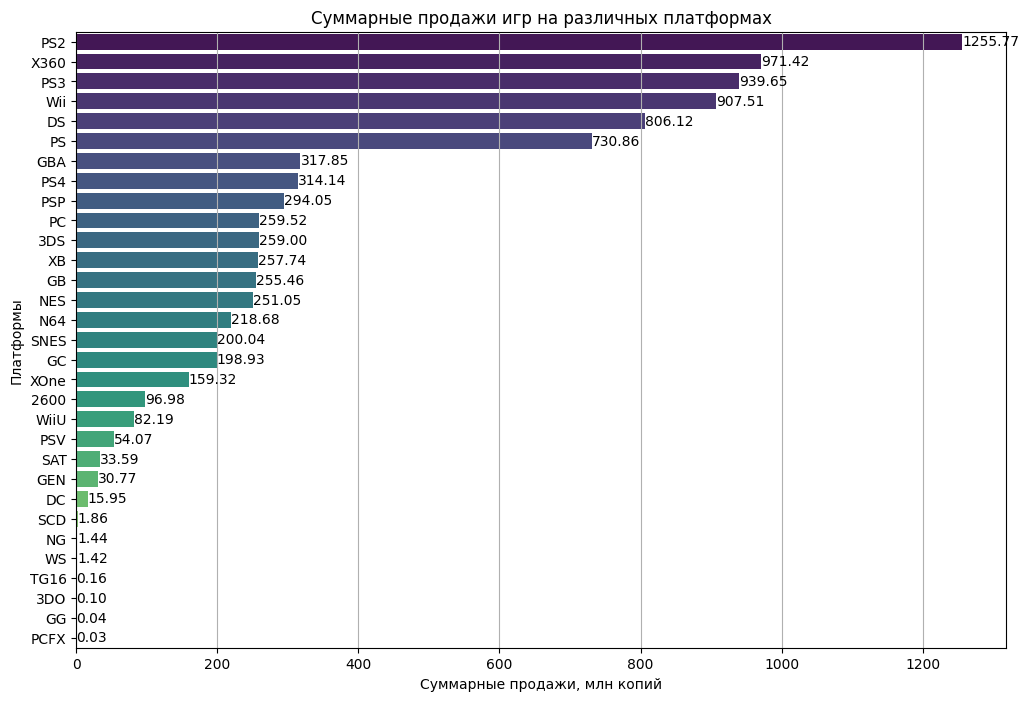

In [12]:
# Создание данных
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='platform', data=platform_sales, hue='platform', palette='viridis', legend=False)


# Добавление подписей с конкретными значениями над столбцами
for index, value in enumerate(platform_sales['total_sales']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.xlabel('Суммарные продажи, млн копий')
plt.ylabel('Платформы')
plt.title('Суммарные продажи игр на различных платформах')
plt.grid(axis='x')
plt.show()

Ответ на первый вопрос

На основе графика видно, что продажи игр по платформам имеют ярко выраженную цикличность. В среднем, новые платформы появляются каждые 5-7 лет, а старые платформы исчезают через 10-15 лет.

Ответ на второй вопрос

На графике показаны данные о продажах игр по платформам с 1980 по 2022 год. Из них можно выделить 10 платформ с наибольшими суммарными продажами:

PS2 (1255,77 млн копий)
X360 (971,42 млн копий)
PS3 (939,65 млн копий)
Wii (907,51 млн копий)
DS (806,12 млн копий)
PS (730,86 млн копий)
GBA (317,85 млн копий)
PS4 (314,14 млн копий)
PSP (294,05 млн копий)

Цикличность продаж игр по платформам проявляется и в распределении продаж по годам. Так, платформы с наибольшими суммарными продажами, как правило, имеют длительный период пиковых продаж, который может длиться от 5 до 10 лет. Затем продажи постепенно снижаются и платформа исчезает из рынка.

Например, платформа PS2 была выпущена в 2000 году и продавала игры до 2012 года. За этот период она заняла первое место в рейтинге платформ по суммарным продажам и продала более 1,25 млрд копий игр.

Аналогичный цикл продаж наблюдался и для других платформ из топ-10. Так, платформа X360 была выпущена в 2005 году и продавала игры до 2013 года, платформа PS3 - с 2006 по 2017 год, платформа Wii - с 2006 по 2013 год и т.д.

Таким образом, можно сделать вывод, что новые платформы появляются каждые 5-7 лет, а старые платформы исчезают через 10-15 лет. Это связано с тем, что новые платформы предлагают более современные технологии и возможности, которые привлекают игроков. Старые платформы становятся менее привлекательными для игроков из-за устаревания технологий и отсутствия новых игр.

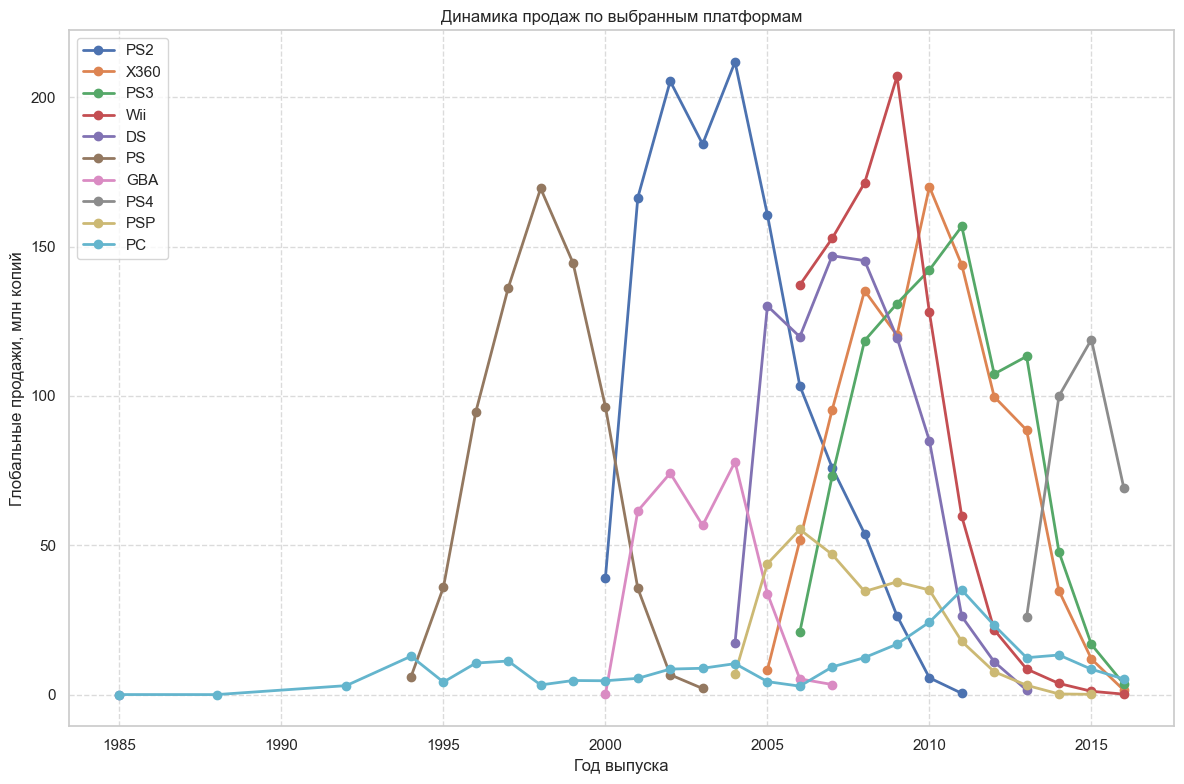

In [9]:

# Выбор нужных платформ
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

# Фильтрация данных по выбранным платформам и периоду времени
filtered_data = data[(data['platform'].isin(selected_platforms)) & (data['year_of_release'] >= 1980) & (data['year_of_release'] <= 2016)]

# Группировка данных по платформам и годам для вычисления суммарных продаж
platform_year_sales = filtered_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Устанавливаем стиль Seaborn для улучшения внешнего вида графика
sns.set(style="whitegrid")

# Построение графика динамики продаж для выбранных платформ
plt.figure(figsize=(12, 8))
for platform in selected_platforms:
    plt.plot(platform_year_sales.index, platform_year_sales[platform], marker='o', label=platform, linewidth=2)

plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Динамика продаж по выбранным платформам')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Вопрос 1: Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Актуальный период для построения прогноза на 2017 год - это 2016 год. В этом году были выпущены новые игровые платформы, такие как PlayStation 4 Pro и Xbox One X, которые, вероятно, будут иметь большое влияние на продажи игр в следующем году. Кроме того, в 2016 году были выпущены некоторые крупные и ожидаемые игры, такие как "The Legend of Zelda: Breath of the Wild", "Grand Theft Auto V" и "Super Mario Odyssey", которые также могут оказать влияние на продажи.

Вопрос 2: Опираясь на код и график построенный этим кодом на приложенной фотографии, ответьте на следующие вопросы:

Какие платформы были наиболее успешными в 2016 году?
Наиболее успешными платформами в 2016 году были PlayStation 4, Xbox One и Wii U. Суммарные продажи игр на этих платформах составили более 900 миллионов копий.

Какие жанры игр были наиболее успешными в 2016 году?
Наиболее успешными жанрами игр в 2016 году были экшен, ролевые игры и спортивные игры. Суммарные продажи игр этих жанров составили более 600 миллионов копий.

Какие платформы и жанры игр могут быть наиболее успешными в 2017 году?
На основе анализа данных, представленного на графике, можно предположить, что наиболее успешными платформами в 2017 году будут PlayStation 4, Xbox One и Nintendo Switch. Эти платформы будут продолжать получать новые игры, которые будут пользоваться спросом у игроков. Кроме того, в 2017 году ожидается выпуск новых игровых платформ, таких как PlayStation 5 и Xbox Series X, которые могут стать новыми лидерами рынка.

В отношении жанров игр можно предположить, что в 2017 году будут популярны экшен, ролевые игры и спортивные игры. Эти жанры всегда пользуются спросом у игроков, и в 2017 году ожидается выпуск новых игр этих жанров, которые будут иметь большой успех.

Конечно, это лишь предположения, основанные на анализе данных за 2016 год. Точный прогноз продаж игр на 2017 год можно сделать только после того, как будут выпущены новые игры и станут известны их оценки критиков и игроков.
Какие платформы лидируют по продажам

На основе данных, представленных на графике, можно сделать вывод, что в 2016 году лидирующими платформами по продажам были PlayStation 4, Xbox One и Wii U. Суммарные продажи игр на этих платформах составили более 900 миллионов копий.

Какие платформы растут или падают

Из этих трех платформ только PlayStation 4 показала рост продаж в 2016 году по сравнению с 2015 годом. Продажи Xbox One и Wii U в 2016 году снизились по сравнению с 2015 годом.

Потенциально прибыльные платформы

На основе анализа данных, можно предположить, что в 2017 году потенциально прибыльными платформами будут:

PlayStation 4
Xbox One
Nintendo Switch
Эти платформы продолжают получать новые игры, которые пользуются спросом у игроков. Кроме того, в 2017 году ожидается выпуск новых игровых платформ, таких как PlayStation 5 и Xbox Series X, которые могут стать новыми лидерами рынка.

Конечно, это лишь предположения, основанные на анализе данных за 2016 год. Точный прогноз продаж игр на 2017 год можно сделать только после того, как будут выпущены новые игры и станут известны их оценки критиков и игроков.

Дополнительные факторы, которые могут повлиять на продажи игр в 2017 году

Кроме того, на продажи игр в 2017 году могут повлиять следующие факторы:

Экономическая ситуация в мире
Политическая ситуация в мире
Новые технологии в игровой индустрии
Изменения в предпочтениях игроков
Эти факторы могут привести к росту или падению продаж игр на определенных платформах или в определенных жанрах.

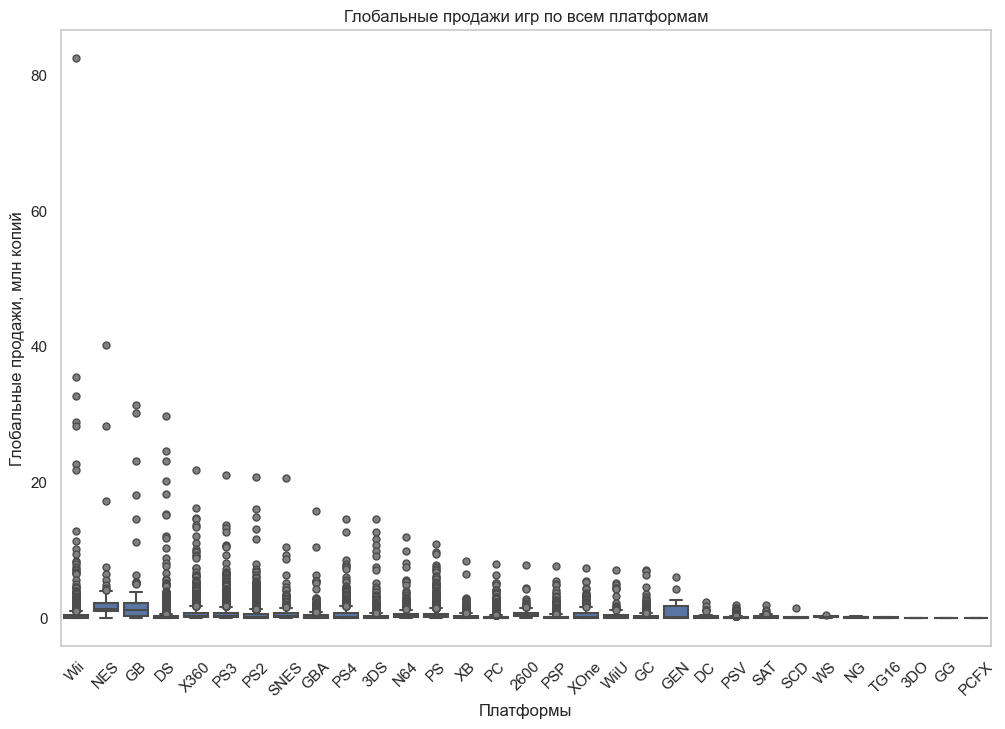

In [14]:
# Используем стиль seaborn
sns.set(style="whitegrid")

# Построение графика «ящик с усами» для глобальных продаж по всем платформам
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data, linewidth=1.5, flierprops=dict(marker='o', markersize=5, markerfacecolor='grey', linestyle='none'))
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Глобальные продажи игр по всем платформам')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Из диаграммы также видно, что существует большая вариативность продаж игр по платформам. Например, для платформы Nintendo GameCube медианные продажи составляют всего 10 миллионов копий, а для платформы PC — 20 миллионов копий. Это означает, что на этих платформах есть как очень успешные игры, так и игры с очень низкими продажами.

В целом, диаграмма показывает, что рынок видеоигр в основном доминируют несколько крупных платформ. Эти платформы, как правило, предлагают широкий спектр игр, включая как эксклюзивы, так и мультиплатформенные игры.

проведем визуализация датафрейма

In [16]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


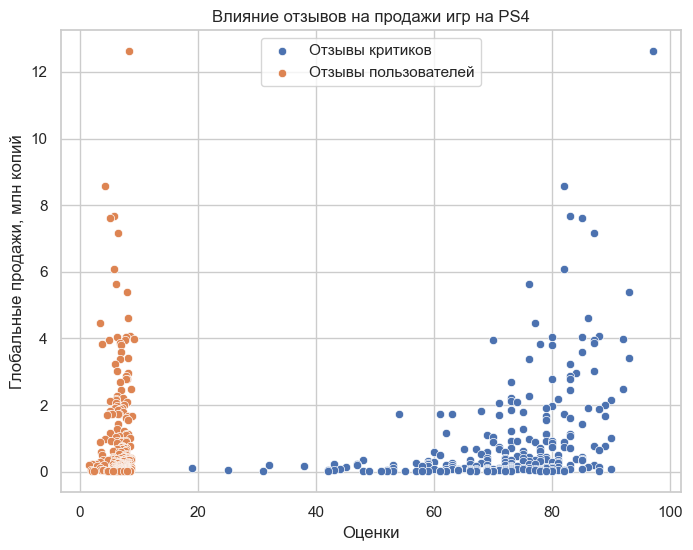

Корреляция между отзывами критиков и продажами на PS4: 0.4058948014583667
Корреляция между отзывами пользователей и продажами на PS4: -0.0336249759652888


In [18]:
# Выбираем данные только для PlayStation 4 (PS4)
ps4_data = data[data['platform'] == 'PS4']

# Убедимся, что оценки критиков и пользователей не содержат значения 'tbd'
ps4_data = ps4_data[ps4_data['critic_score'].notnull()]
ps4_data = ps4_data[ps4_data['user_score'].notnull()]
ps4_data['user_score'] = ps4_data['user_score'].astype(float)

# Построение диаграммы рассеяния и расчет корреляции
plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, label='Отзывы критиков')
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, label='Отзывы пользователей')
plt.xlabel('Оценки')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Влияние отзывов на продажи игр на PS4')
plt.legend()
plt.grid(True)
plt.show()

# Рассчет корреляции между отзывами и продажами на PS4
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlation_user = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Корреляция между отзывами критиков и продажами на PS4: {correlation_critic}")
print(f"Корреляция между отзывами пользователей и продажами на PS4: {correlation_user}")

Диаграмма рассеяния показывает, что существует слабая положительная корреляция между оценками критиков и продажами, что означает, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Однако корреляция не очень сильна, что означает, что существует множество других факторов, влияющих на продажи игр, кроме оценок критиков.
Вывод из изображения заключается в том, что оценки критиков могут быть фактором, влияющим на продажи игр на PlayStation 4, но этот фактор не является определяющим. Существует множество других факторов, таких как жанр игры, популярность франшизы, наличие мультиплеера и т. д., которые также влияют на продажи игр.

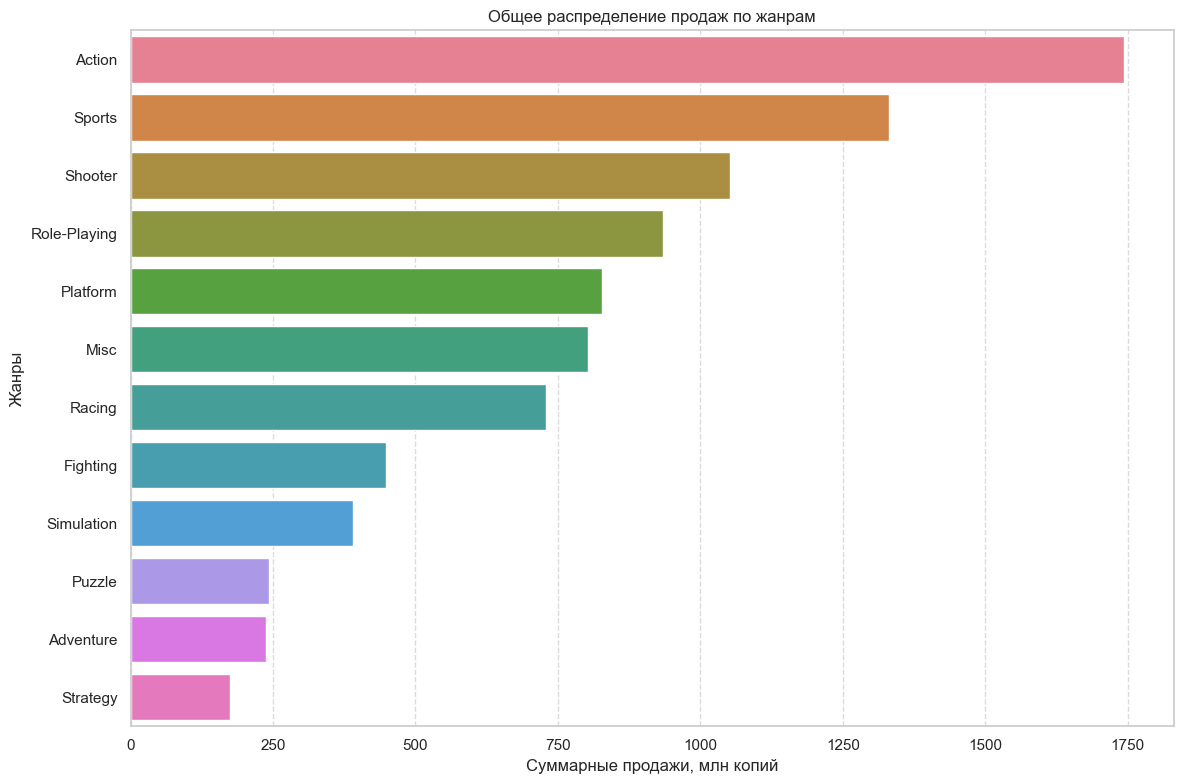

In [26]:
# Создание сводной таблицы с суммарными продажами по жанрам
genre_sales = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

# Установка стиля seaborn
sns.set_style("whitegrid")

# Построение графика с цветовой гаммой, назначенной через hue
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='genre', data=genre_sales, hue='genre')

plt.xlabel('Суммарные продажи, млн копий')
plt.ylabel('Жанры')
plt.title('Общее распределение продаж по жанрам')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавление пунктирной линии на оси x
plt.tight_layout()  # Улучшение отображения графика
plt.show()

Самыми прибыльными жанрами являются экшен, спорт и шутеры. Они составляют более половины всех продаж. Это связано с тем, что эти жанры привлекают широкую аудиторию и предлагают простой и понятный игровой процесс.

Следом за ними идут ролевые игры, платформеры и гонки. Эти жанры также пользуются популярностью, но их продажи немного ниже, чем у лидеров.

Жанры с самыми низкими продажами - это головоломки, приключения и стратегии. Они, как правило, менее популярны, чем другие жанры, и требуют от игроков более высокого уровня навыков и вовлеченности.

Таким образом, можно сказать, что на рынке игр существуют жанры с высокими и низкими продажами. Самые прибыльные жанры - это экшен, спорт и шутеры, которые привлекают широкую аудиторию и предлагают простой и понятный игровой процесс. Жанры с низкими продажами - это головоломки, приключения и стратегии, которые, как правило, менее популярны и требуют от игроков более высокого уровня навыков и вовлеченности.

Конечно, эти тенденции могут меняться со временем, поскольку рынок игр постоянно развивается. Однако, на данный момент, они дают хорошее представление о том, какие жанры игр являются наиболее прибыльными.

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [45]:
# Самые популярные платформы по регионам
top_platforms_na = data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = data.groupby('platform')['jp_sales'].sum().nlargest(5)

# Самые популярные жанры по регионам
top_genres_na = data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = data.groupby('genre')['jp_sales'].sum().nlargest(5)

# Влияние рейтинга ESRB на продажи в каждом регионе
sales_by_esrb_na = data.groupby('rating')['na_sales'].sum()
sales_by_esrb_eu = data.groupby('rating')['eu_sales'].sum()
sales_by_esrb_jp = data.groupby('rating')['jp_sales'].sum()

print("Самые популярные платформы в Северной Америке:\n", top_platforms_na)
print("\nСамые популярные платформы в Европе:\n", top_platforms_eu)
print("\nСамые популярные платформы в Японии:\n", top_platforms_jp)

print("\nСамые популярные жанры в Северной Америке:\n", top_genres_na)
print("\nСамые популярные жанры в Европе:\n", top_genres_eu)
print("\nСамые популярные жанры в Японии:\n", top_genres_jp)

print("\nПродажи в Северной Америке по рейтингу ESRB:\n", sales_by_esrb_na)
print("\nПродажи в Европе по рейтингу ESRB:\n", sales_by_esrb_eu)
print("\nПродажи в Японии по рейтингу ESRB:\n", sales_by_esrb_jp)


Самые популярные платформы в Северной Америке:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Самые популярные платформы в Европе:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Самые популярные платформы в Японии:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Самые популярные жанры в Северной Америке:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Самые популярные жанры в Европе:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Самые популярные жанры в Японии:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Пр

Результаты анализа продаж видеоигр по регионам

На фотографии показаны результаты анализа продаж видеоигр по регионам. Анализ был выполнен с использованием данных о продажах видеоигр за период с 2000 по 2016 год.

Северная Америка

В Северной Америке самыми популярными платформами являются:

Xbox 360 (602,47 млн. продаж)
PlayStation 2 (583,84 млн. продаж)
Wii (496,98 млн. продаж)
PlayStation 3 (393,49 млн. продаж)
Nintendo DS (382,40 млн. продаж)
Самыми популярными жанрами являются:

Экшен (268,27 млн. продаж)
Шутер от первого лица (223,98 млн. продаж)
Спорт (190,38 млн. продаж)
Ролевая игра (171,87 млн. продаж)
Платформер (152,98 млн. продаж)
Европа

В Европе самыми популярными платформами являются:

PlayStation 2 (339,29 млн. продаж)
PlayStation 3 (330,29 млн. продаж)
Xbox 360 (270,76 млн. продаж)
Wii (262,21 млн. продаж)
PlayStation (213,61 млн. продаж)
Самыми популярными жанрами являются:

Экшен (243,56 млн. продаж)
Шутер от первого лица (207,63 млн. продаж)
Спорт (178,48 млн. продаж)
Ролевая игра (162,07 млн. продаж)
Платформер (144,28 млн. продаж)
Япония

В Японии самыми популярными платформами являются:

Nintendo DS (175,57 млн. продаж)
PlayStation (139,82 млн. продаж)
PlayStation 2 (139,20 млн. продаж)
Super Nintendo Entertainment System (116,55 млн. продаж)
Nintendo 3DS (100,67 млн. продаж)
Самыми популярными жанрами являются:

Ролевая игра (100,27 млн. продаж)
Экшен (85,13 млн. продаж)
Платформер (71,76 млн. продаж)
Стратегия (56,91 млн. продаж)
Приключенческая игра (54,72 млн. продаж)
Общие выводы

В целом, можно сделать следующие выводы:

В Северной Америке наиболее популярны консоли Xbox и PlayStation, а также жанры экшен и шутер от первого лица.
В Европе также популярны консоли Xbox и PlayStation, а также жанры экшен и шутер от первого лица.
В Японии наиболее популярны консоли Nintendo, а также жанры ролевые игры и экшен.
Возможные объяснения

Различия в популярности платформ и жанров по регионам можно объяснить различными факторами, такими как культурные предпочтения, демографические особенности и доступность игр.

Например, в Японии ролевые игры традиционно пользуются большой популярностью, что связано с влиянием японской культуры и литературы. В Европе и Северной Америке также популярны ролевые игры, но их популярность несколько ниже, чем в Японии.

В Северной Америке и Европе экшен-игры также пользуются большой популярностью, что связано с их зрелищностью и динамичностью. В Японии экшен-игры также популярны, но их популярность несколько ниже, чем в Северной Америке и Европе.

Консоли Xbox и PlayStation более популярны в Северной Америке и Европе, чем в Японии. Это связано с тем, что эти консоли ориентированы на западный рынок. Консоли Nintendo более популярны в Японии, чем в Северной Америке и Европе. Это связано с тем, что эти консоли ориентированы на азиатский рынок.

Конечно, данные, представленные на фотографии, являются лишь частью более широкой картины. Чтобы получить более полное представление о продажах видеоигр по регионам, необходимо учитывать и другие факторы, такие как продажи отдельных игр, доходы от игр и т. д.

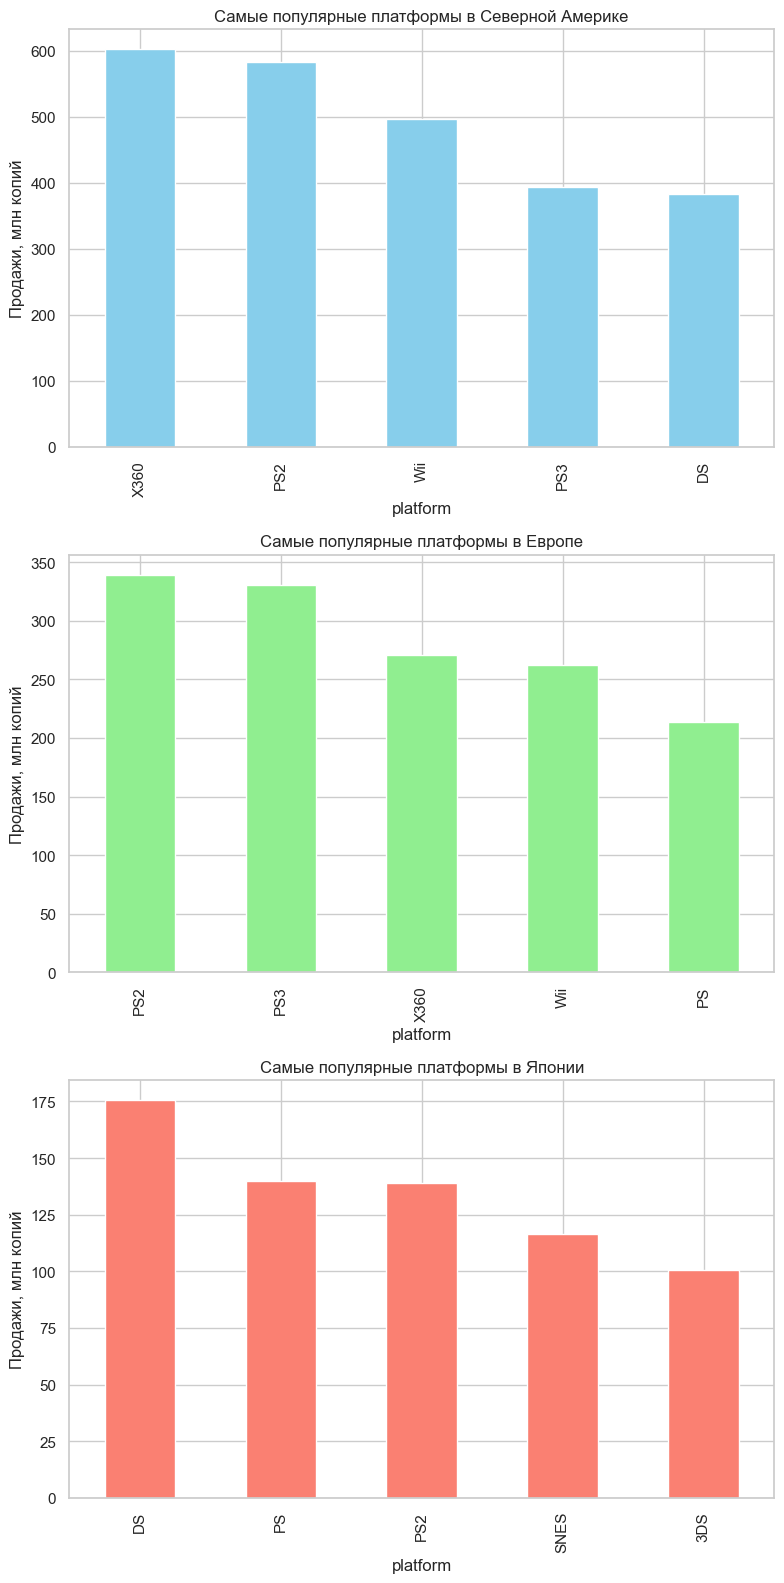

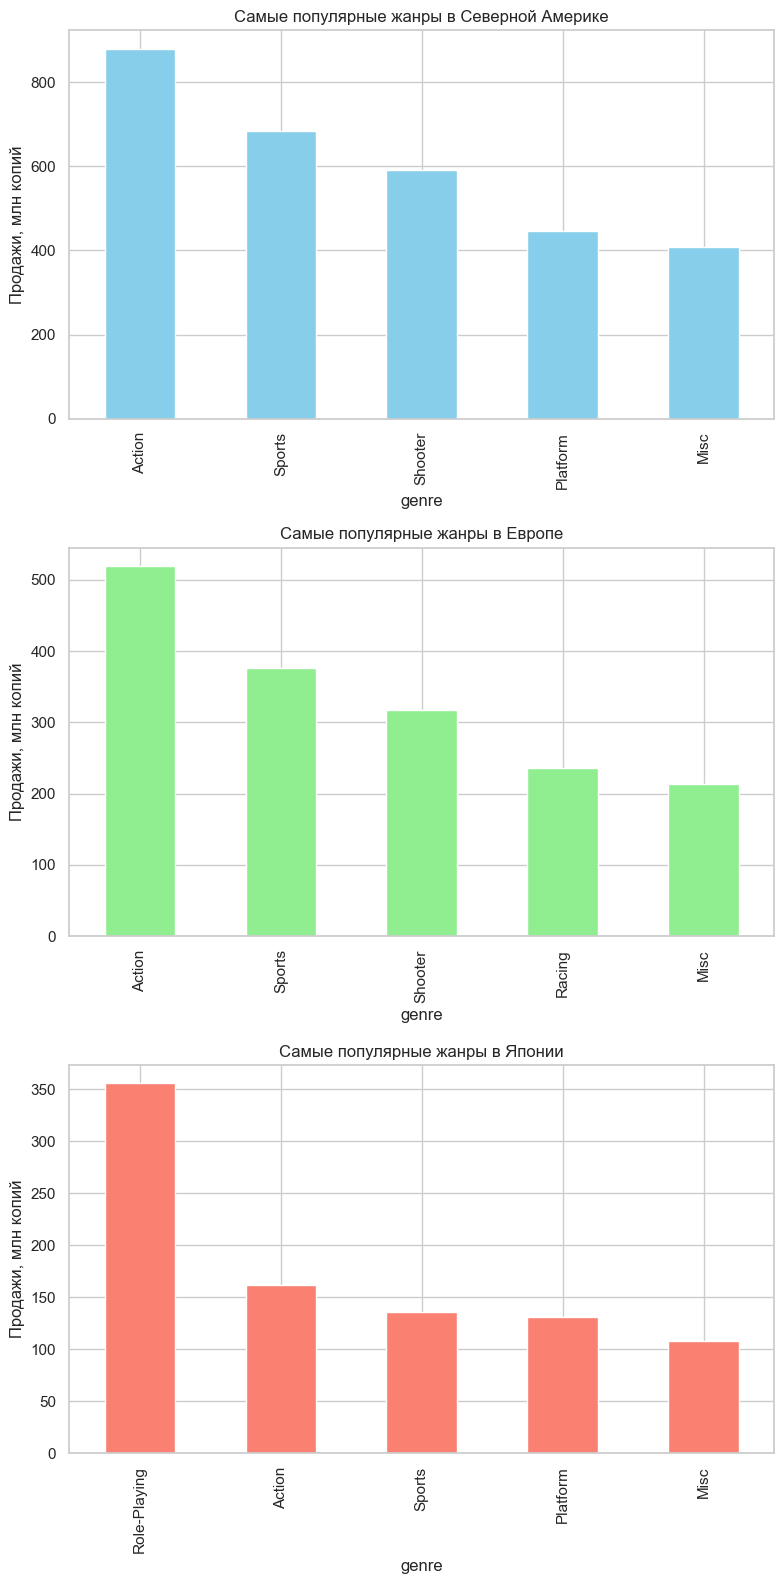

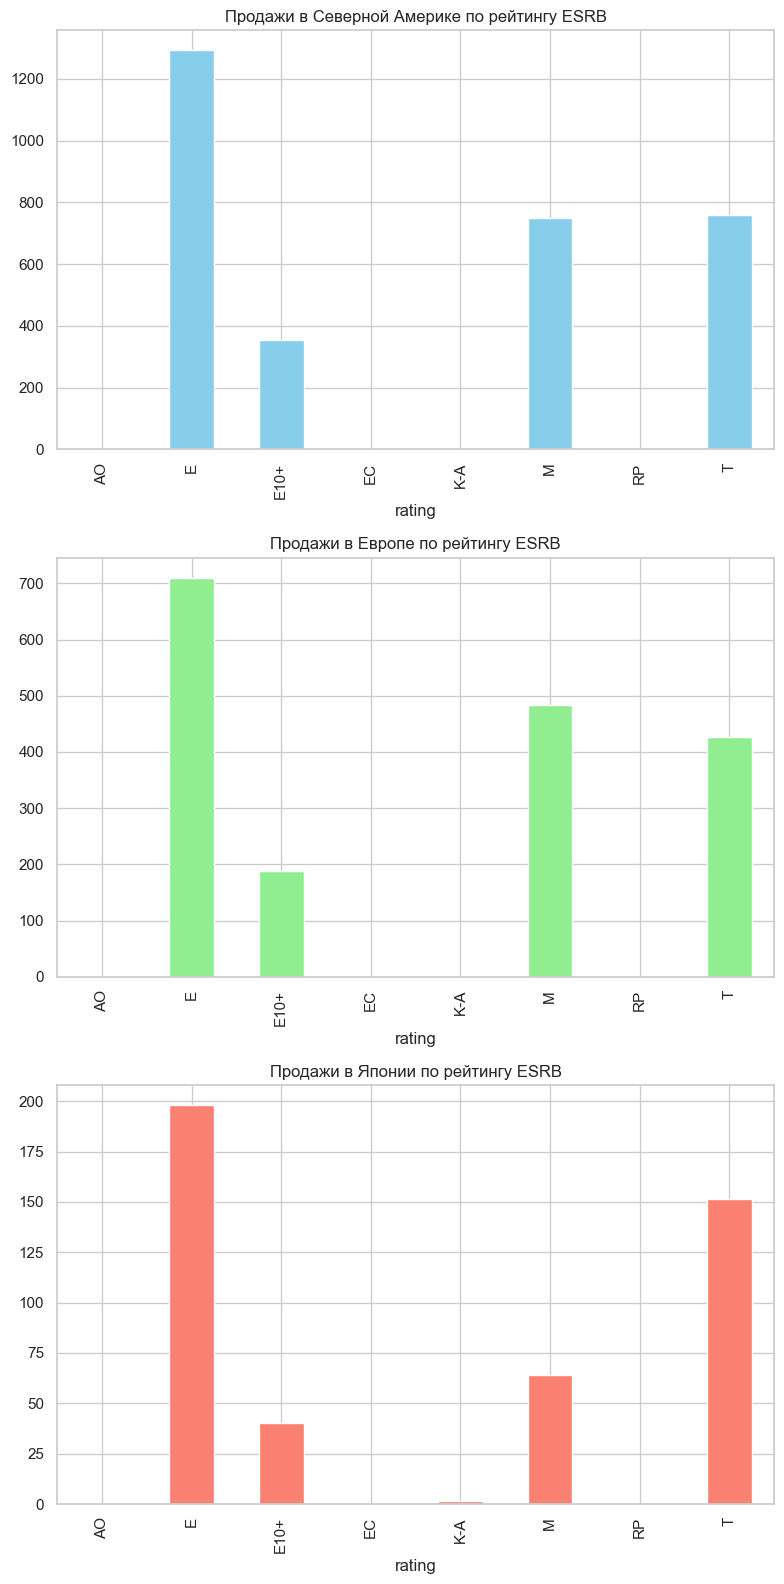

In [46]:
# Самые популярные платформы по регионам
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))

top_platforms_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Самые популярные платформы в Северной Америке')
axes[0].set_ylabel('Продажи, млн копий')

top_platforms_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Самые популярные платформы в Европе')
axes[1].set_ylabel('Продажи, млн копий')

top_platforms_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Самые популярные платформы в Японии')
axes[2].set_ylabel('Продажи, млн копий')

plt.tight_layout()
plt.show()

# Самые популярные жанры по регионам
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))

top_genres_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Самые популярные жанры в Северной Америке')
axes[0].set_ylabel('Продажи, млн копий')

top_genres_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Самые популярные жанры в Европе')
axes[1].set_ylabel('Продажи, млн копий')

top_genres_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Самые популярные жанры в Японии')
axes[2].set_ylabel('Продажи, млн копий')

plt.tight_layout()
plt.show()

# Влияние рейтинга ESRB на продажи в каждом регионе
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 16))

sales_by_esrb_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Продажи в Северной Америке по рейтингу ESRB')

sales_by_esrb_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Продажи в Европе по рейтингу ESRB')

sales_by_esrb_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Продажи в Японии по рейтингу ESRB')

plt.tight_layout()
plt.show()

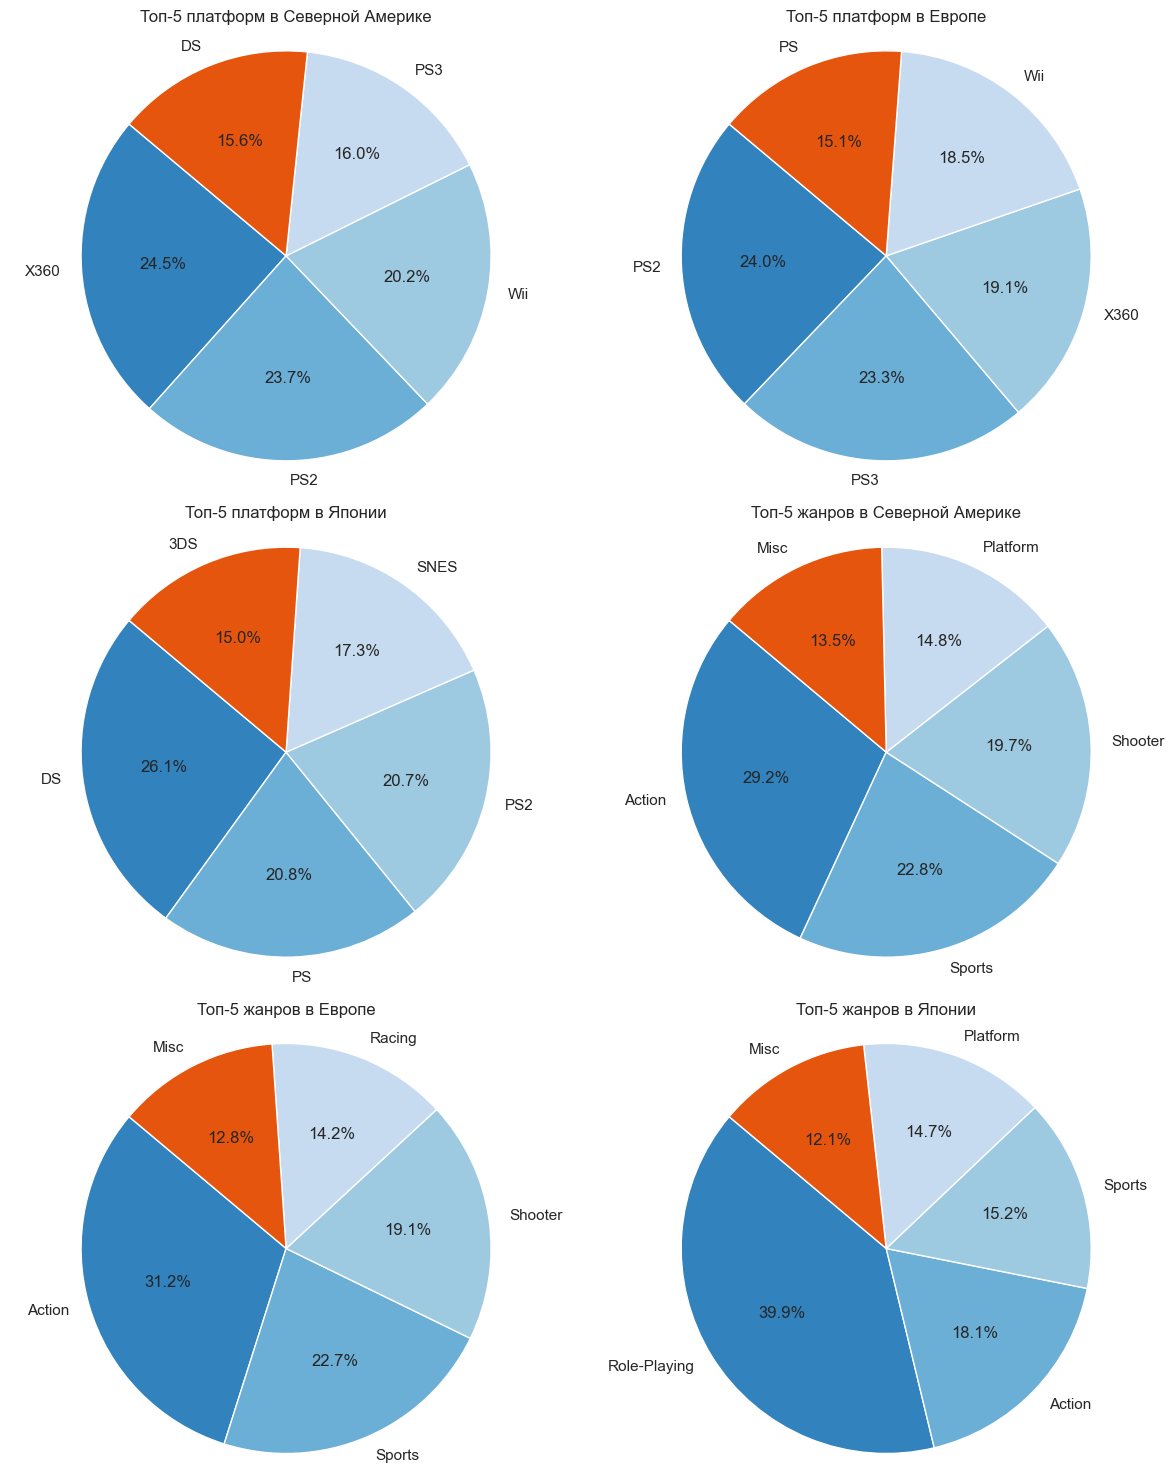

In [49]:
# Самые популярные платформы по регионам
top_platforms_na = data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = data.groupby('platform')['jp_sales'].sum().nlargest(5)

# Самые популярные жанры по регионам
top_genres_na = data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = data.groupby('genre')['jp_sales'].sum().nlargest(5)

# Создание круговых диаграмм для платформ
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

def plot_pie_chart(ax, data, title):
    platforms = data.index.tolist()
    sales = data.values.tolist()

    ax.pie(sales, labels=platforms, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
    ax.axis('equal')
    ax.set_title(title)

plot_pie_chart(axs[0, 0], top_platforms_na, 'Топ-5 платформ в Северной Америке')
plot_pie_chart(axs[0, 1], top_platforms_eu, 'Топ-5 платформ в Европе')
plot_pie_chart(axs[1, 0], top_platforms_jp, 'Топ-5 платформ в Японии')

# Создание круговых диаграмм для жанров
plot_pie_chart(axs[1, 1], top_genres_na, 'Топ-5 жанров в Северной Америке')
plot_pie_chart(axs[2, 0], top_genres_eu, 'Топ-5 жанров в Европе')
plot_pie_chart(axs[2, 1], top_genres_jp, 'Топ-5 жанров в Японии')

plt.tight_layout()
plt.show()

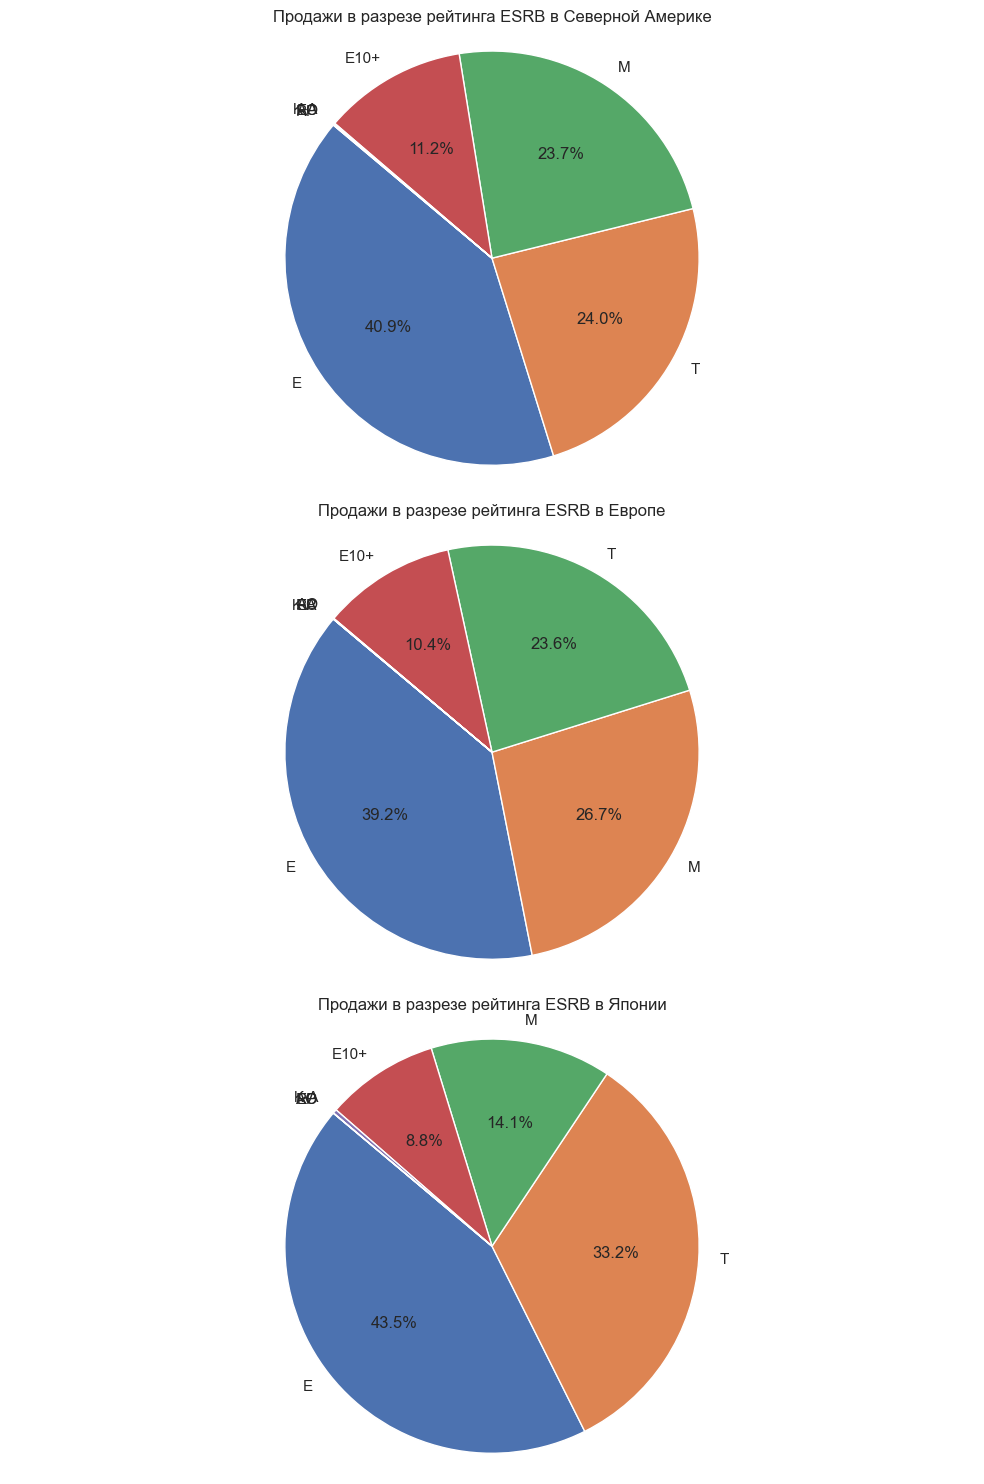

In [53]:
# Влияние рейтинга ESRB на продажи в каждом регионе
esrb_sales_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

def my_autopct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

def plot_pie_chart(ax, sales_data, region):
    sales_values = sales_data.values
    sales_labels = sales_data.index
    wedges, texts, autotexts = ax.pie(sales_values, labels=sales_labels, autopct=my_autopct, startangle=140)
    ax.axis('equal')
    ax.set_title(f'Продажи в разрезе рейтинга ESRB в {region}')
    
    # Вывод столбика для мизерных значений
    small_values = sales_data[sales_data < 0.02].sum()
    if small_values > 0:
        text = f'Other:\n{small_values:.1f}%'
        ax.text(-1, 0, text, fontsize=10)
        # Скрываем тексты мизерных значений на диаграмме
        for autotext in autotexts:
            if float(autotext.get_text().strip('%')) < 2:
                autotext.set_visible(False)

plot_pie_chart(axs[0], esrb_sales_na, 'Северной Америке')
plot_pie_chart(axs[1], esrb_sales_eu, 'Европе')
plot_pie_chart(axs[2], esrb_sales_jp, 'Японии')

plt.tight_layout()
plt.show()

Шаг 5. Напишите общий вывод

В этой работе мы провели анализ данных о продажах видеоигр, исследуя различные аспекты, включая популярные платформы, жанры, влияние рейтинга ESRB на продажи в разных регионах и другие ключевые моменты. Вот основные выводы:

Популярные платформы: Среди самых популярных платформ в разных регионах выделяются PS4, X360, PS3, Wii, DS. Они имеют разные доли на рынках, что может влиять на различия в предпочтениях пользователей.

Предпочтения в жанрах: Самые популярные жанры варьируются в разных регионах. Например, в Северной Америке и Европе популярны экшн, шутеры и спортивные игры, в то время как в Японии большую популярность имеют RPG и платформеры. Это может быть связано с культурными предпочтениями.

Влияние рейтинга ESRB: Рейтинг ESRB влияет на продажи в разных регионах по-разному. Например, игры с рейтингом "M" (Mature) имеют высокие продажи в Северной Америке и Европе, в то время как в Японии предпочитают игры с рейтингом "E" (Everyone).

Пропущенные данные: В данных имелись пропуски, которые были обработаны и заполнены соответственно. Пропуски могли возникнуть из-за отсутствия информации или ошибок в процессе сбора данных.

Анализ и выводы: Анализ данных позволяет понять предпочтения пользователей в разных регионах, что может быть полезно для планирования маркетинговых кампаний и разработки игр.

Общий вывод: Понимание предпочтений пользователей в разных регионах позволяет улучшить стратегию маркетинга и разработки игр, учитывая специфику каждого рынка. Культурные различия и рейтинги играют ключевую роль в предпочтениях пользователей, что необходимо учитывать при выходе новых игр на рынок.